[View in Colaboratory](https://colab.research.google.com/github/joheras/CLoDSA/blob/master/notebooks/CLODSA_Plants.ipynb)

# Augmenting a dataset for object detection

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to object detection. In particular, we use the [Plant Phenotyping dataset for object detection](https://www.plant-phenotyping.org/datasets-home) - from now on we will call this dataset, the Plant dataset.

The Plant training dataset for object detection, presented in the paper ["Finely-grained annotated datasets for image-based plant phenotyping"](https://www.sciencedirect.com/science/article/pii/S0167865515003645#sec0007), consists of 70 tray images where plants can be arranged in a grid, either fixed in position in specialized trays or not and can even be touching each other, the latter leading to a non trivial detection problem. For illustration purposes, we take a subset of the Plant dataset containing 27 images. Such a subset can be downloaded by executing the following command. 

In [1]:
!wget https://www.dropbox.com/s/9mtp7x8lpvw7alt/Tray.zip?dl=0 -O Tray.zip
!unzip Tray.zip

--2018-06-13 09:34:50--  https://www.dropbox.com/s/9mtp7x8lpvw7alt/Tray.zip?dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 162.125.68.1, 2620:100:6024:1::a27d:4401
Conectando con www.dropbox.com (www.dropbox.com)[162.125.68.1]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://uca0d7cbf829f67d9527e08eec60.dl.dropboxusercontent.com/cd/0/get/AIuDW3loZR9RDkxO5Mr5ZqwQtf7EgbS76cRqb65TJQ3CwgASBJIB8xPXmAJf3PR4ltLrSOG00TjxrPSH-pa8s4zD4HCCU-6o9Rna7mCpgkwi0SI21wmKsnoiRU8HLwc8_mHFgLvDWgEuV8briPEBPE8l3w7x6NX_3s4PpH72uTbrnSKY3LiQN29SPTzd8jnnqKw/file [siguiente]
--2018-06-13 09:34:51--  https://uca0d7cbf829f67d9527e08eec60.dl.dropboxusercontent.com/cd/0/get/AIuDW3loZR9RDkxO5Mr5ZqwQtf7EgbS76cRqb65TJQ3CwgASBJIB8xPXmAJf3PR4ltLrSOG00TjxrPSH-pa8s4zD4HCCU-6o9Rna7mCpgkwi0SI21wmKsnoiRU8HLwc8_mHFgLvDWgEuV8briPEBPE8l3w7x6NX_3s4PpH72uTbrnSKY3LiQN29SPTzd8jnnqKw/file
Resolviendo uca0d7cbf829f67d9527e08eec60.dl.dropboxusercontent.com (uca0d7cbf829f67d9527e08eec60.d

We can check the amount of images in each one of the folders.

In [2]:
print("Number of images in the folder")
!ls -1 Tray/Ara2013-Canon/*.png | wc -l

Number of images in the folder
27


## Preparing the dataset

Each image of the Plant dataset is annotated with a comma-separated value (CSV) file reporting for each plant the corner pixel coordinates of its bounding box. This format is not currently supported by the CLODSA library, so we provide a script that convert the CSV files to xml files following the [PASCAL VOC format](https://link.springer.com/article/10.1007/s11263-009-0275-4) - a common format employed in object detection problems and that is already supported by CLODSA.




In [3]:
!wget https://www.dropbox.com/s/tchi6u74q7whe2w/plants_script.py?dl=0 -O plants_script.py

--2018-06-13 09:35:06--  https://www.dropbox.com/s/tchi6u74q7whe2w/plants_script.py?dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 162.125.68.1, 2620:100:6024:1::a27d:4401
Conectando con www.dropbox.com (www.dropbox.com)[162.125.68.1]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://uc2839df12fd5f8fef8fd84380a5.dl.dropboxusercontent.com/cd/0/get/AItwJ44KypmIaGbrTqZjJnxa_1enLx7tjeNdUZpGfmmusMgBijVEhobTu4X6l_KcijmAdQHHcZGkwphNr6fTI5ha1Crp3SJNNG8i_O4EMgpFQNUdgS2bheQnc3FF8I9RPsDtgMLBRCGsUiOiJvP1-B4q_SuH5pOLOruL5_ZT4mGMTw2ALBmSzE_pcNm6VYJ2Zt0/file [siguiente]
--2018-06-13 09:35:07--  https://uc2839df12fd5f8fef8fd84380a5.dl.dropboxusercontent.com/cd/0/get/AItwJ44KypmIaGbrTqZjJnxa_1enLx7tjeNdUZpGfmmusMgBijVEhobTu4X6l_KcijmAdQHHcZGkwphNr6fTI5ha1Crp3SJNNG8i_O4EMgpFQNUdgS2bheQnc3FF8I9RPsDtgMLBRCGsUiOiJvP1-B4q_SuH5pOLOruL5_ZT4mGMTw2ALBmSzE_pcNm6VYJ2Zt0/file
Resolviendo uc2839df12fd5f8fef8fd84380a5.dl.dropboxusercontent.com (uc2839df12fd5f8fef8fd8

In [4]:
!pip install imutils
!python plants_script.py

You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Augmentation techniques

In this notebook, we will use the following augmentation techniques:
- Vertical, horizontal, and vertical-horizontal flips.
- 180º Rotation.
- Average blurring.
- Raise the hue value. 

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [7]:
!pip install clodsa

  Running setup.py bdist_wheel for clodsa ... done
  Stored in directory: /home/joheras/.cache/pip/wheels/6d/67/af/aab3f135d04de247c86f8182950cbb77e48d47d537c3354925
Successfully built clodsa
You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA. We also load some libraries to show the results.

In [8]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.augmentors.generator import Generator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

Using TensorFlow backend.


## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in a detection problem

In [9]:
PROBLEM = "detection"

_The annotation mode_. We use the Pascal VOC format. 

In [10]:
ANNOTATION_MODE = "pascalvoc"

_The input path_. The input path containing the images. 

In [11]:
INPUT_PATH = "Tray/Ara2013-Canon/"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [12]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called augmented_images.  

In [13]:
OUTPUT_MODE = "pascalvoc"
OUTPUT_PATH= "Tray/Ara2013-Canon"

Using the above information, we can create our augmentor object. 

In [14]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



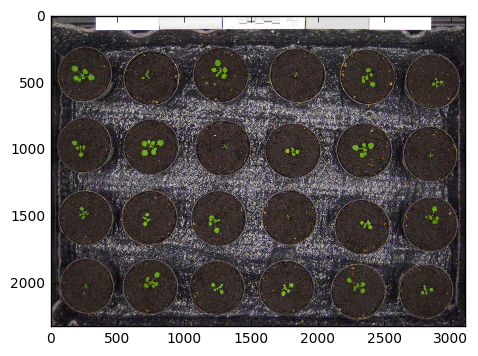

In [15]:
img = cv2.imread("Tray/Ara2013-Canon/ara2013_tray05_rgb.png")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

Just for showing the results of applying data augmentation in an object detection problem, we define a function to read the annotations and another one to show them. This funcionality is not necessary when using CLODSA since it is already implemented in there. 

In [16]:
def boxesFromPascalVOC(labelPath):
    tree = ET.parse(labelPath)
    root = tree.getroot()
    objects = root.findall('object')
    if(len(objects)<1):
        raise Exception("The xml should contain at least one object")
    boxes = []
    for object in objects:
        category = object.find('name').text
        bndbox = object.find('bndbox')
        x  = int(bndbox.find('xmin').text)
        y = int(bndbox.find('ymin').text)
        h = int(bndbox.find('ymax').text)-y
        w = int(bndbox.find('xmax').text) - x
        boxes.append((category, (x, y, w, h)))
    return boxes

In [17]:
def showBoxes(image,boxes):
    cloneImg = image.copy()
    for (category, (x, y, w, h)) in boxes:
        cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(255,0,0),15)
    plt.imshow(cloneImg[:,:,::-1])
    

Now, we show the annotation of the image.

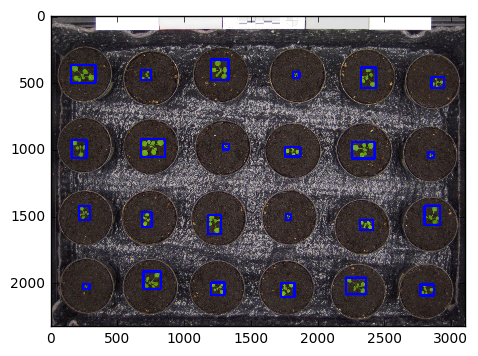

In [18]:
boxes = boxesFromPascalVOC("Tray/Ara2013-Canon/ara2013_tray05_rgb.xml")
showBoxes(img,boxes)

#### Vertical flip

In [19]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addGenerator(Generator(vFlip))

Showing the result of applying the transformation.

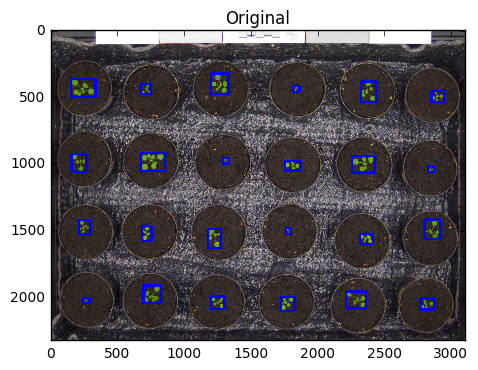

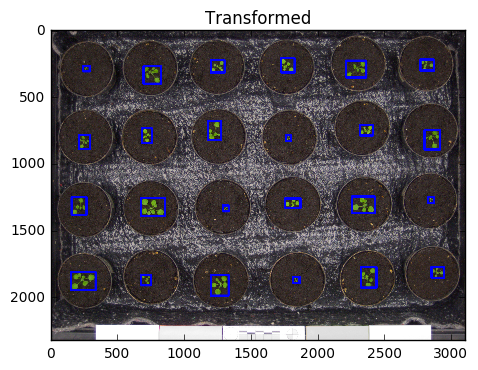

In [20]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = Generator(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

#### Horizontal flip

In [21]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addGenerator(Generator(hFlip))

Showing the result of applying the transformation.

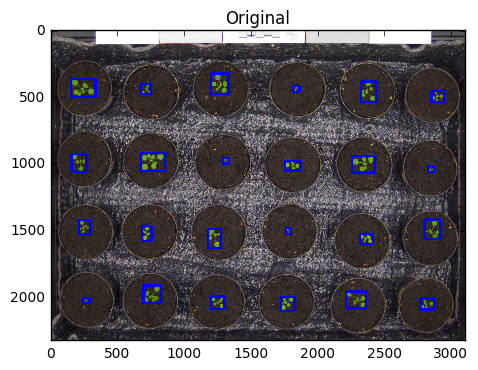

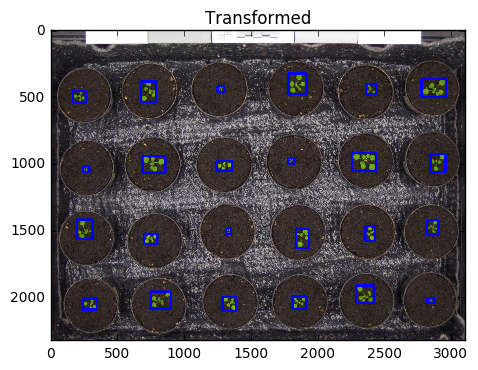

In [22]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = Generator(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

#### Horizontal and vertical flip

In [23]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addGenerator(Generator(hvFlip))

Showing the result of applying the transformation.

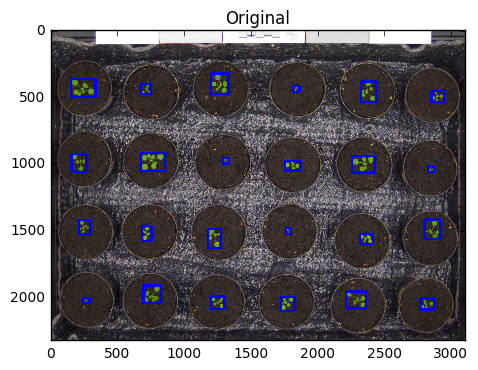

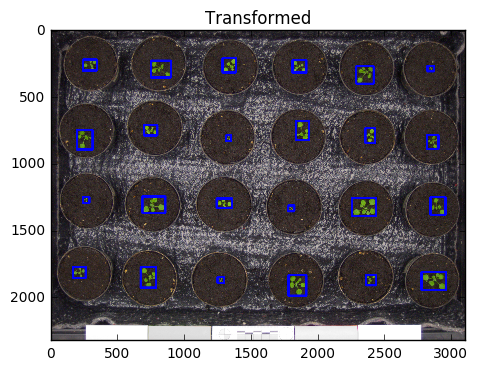

In [24]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = Generator(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hvFlipImg,hvFlipBoxes)

#### Rotation:

In [25]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addGenerator(Generator(rotate))

Showing the result of applying the transformation.

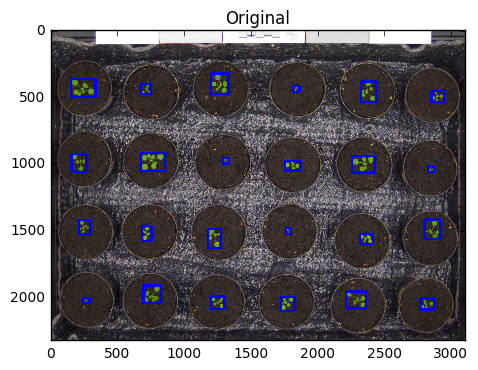

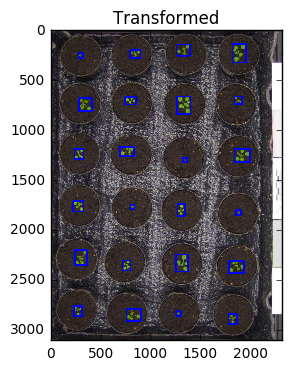

In [26]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = Generator(rotate)
rotateImg,rotateBoxes = rotateGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

#### Average blurring

In [27]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addGenerator(Generator(avgBlur))

Showing the result of applying the transformation.

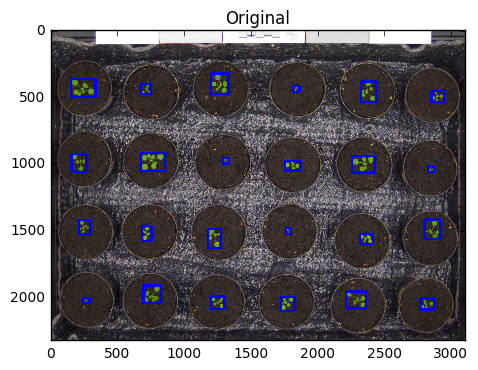

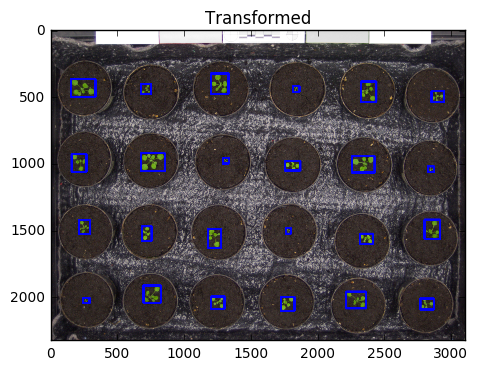

In [28]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = Generator(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(avgBlurImg,avgBlurBoxes)

#### Raise Hue

In [29]:
hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addGenerator(Generator(hue))

Showing the result of applying the transformation.

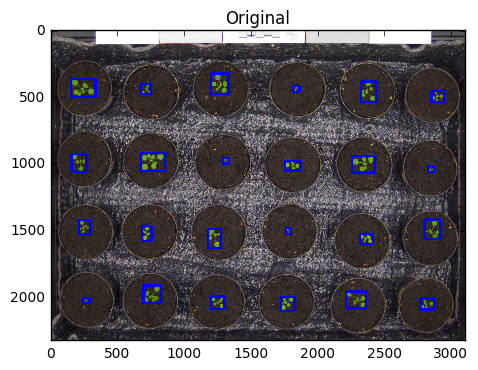

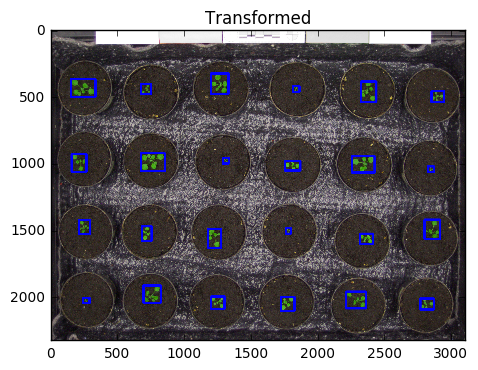

In [30]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = Generator(hue)
hueImg,hueBoxes = hueGenerator.applyForDetection(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hueImg,hueBoxes)

#### None
(to keep also the original image)

In [31]:
none = createTechnique("none",{})
augmentor.addGenerator(Generator(none))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [ ]:
augmentor.applyAugmentation()

Finally, we can check the amount of images in the output folder.

In [0]:
print("Number of images in the folder")
!ls -1 Tray/Ara2013-Canon/*.png | wc -l

Number of images in the folder
216
